<a href="https://colab.research.google.com/github/srikanthkote/ml-playground/blob/main/housing_data_xplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"housing.csv"

## Data loading

### Subtask:
Load the housing data from the provided CSV file.


**Reasoning**:
Load the housing data from the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df_housing = pd.read_csv('housing.csv')
    display(df_housing.head())
    print(df_housing.shape)
except FileNotFoundError:
    print("Error: 'housing.csv' not found. Please ensure the file is in the correct location.")
except pd.errors.ParserError:
    print("Error: Could not parse 'housing.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(20640, 10)


## Data exploration

### Subtask:
Explore the loaded housing data.


**Reasoning**:
I need to explore the data by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical features.



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_housing.shape)

# Determine data types of each column
print("\nData Types of Columns:")
print(df_housing.info())

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df_housing.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df_housing.isnull().sum())

# Explore categorical features
print("\nCategorical Feature Exploration:")
for col in df_housing.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df_housing[col].unique()}")
    print(f"Value Counts:\n{df_housing[col].value_counts()}")

Shape of the DataFrame: (20640, 10)

Data Types of Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Descriptive Statistics for Numerical Features:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000

## Data visualization

### Subtask:
Visualize the distribution of numerical and categorical features in the housing dataset.


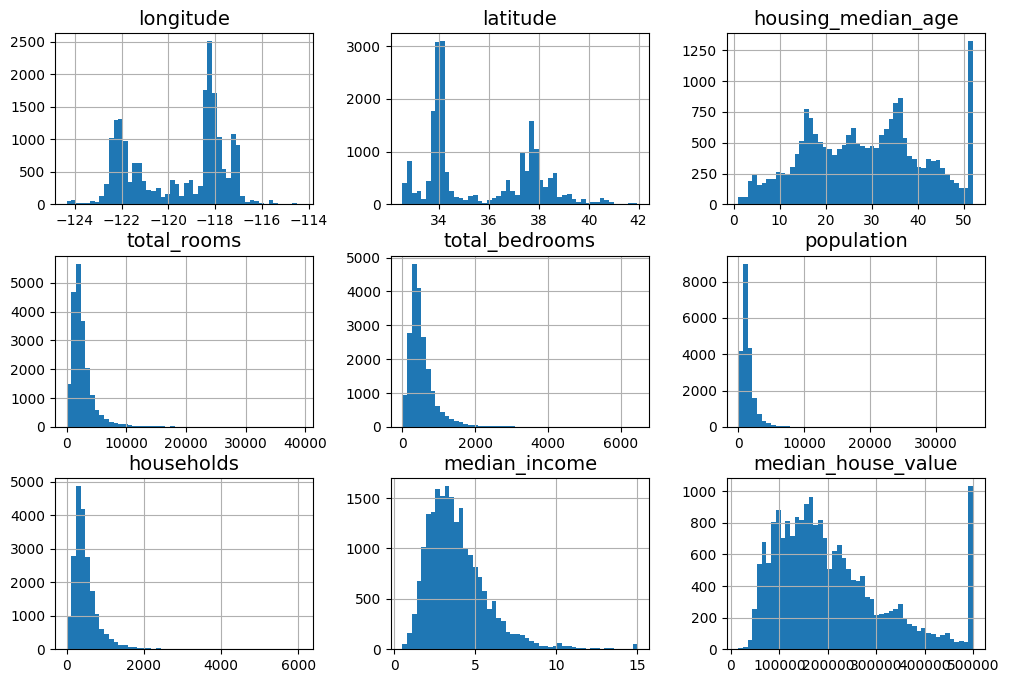

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_housing.hist(bins=50, figsize=(12, 8))
plt.show()

**Reasoning**:
Visualize the distribution of numerical and categorical features using histograms and bar plots, then save the plots.



In [ ]:
import matplotlib.pyplot as plt

# Numerical features visualization
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df_housing[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'{col}_distribution.png')
    plt.close()

# Categorical feature visualization
plt.figure(figsize=(10, 6))
df_housing['ocean_proximity'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity Category')
plt.ylabel('Frequency')
plt.savefig('ocean_proximity_distribution.png')
plt.close()

## Data analysis

### Subtask:
Analyze the correlations between numerical features and the distribution of the target variable.


**Reasoning**:
Calculate the correlation matrix for numerical features, visualize the target variable's distribution, and identify potential relationships.



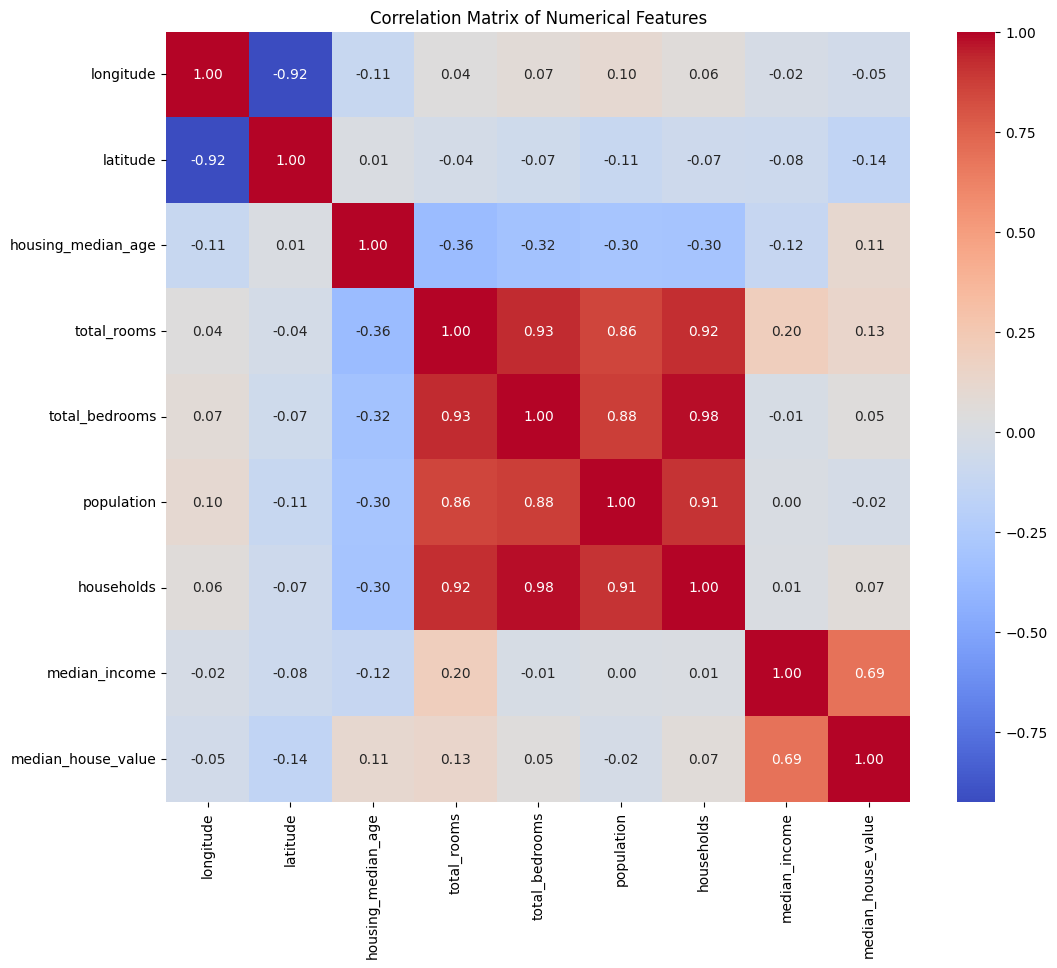

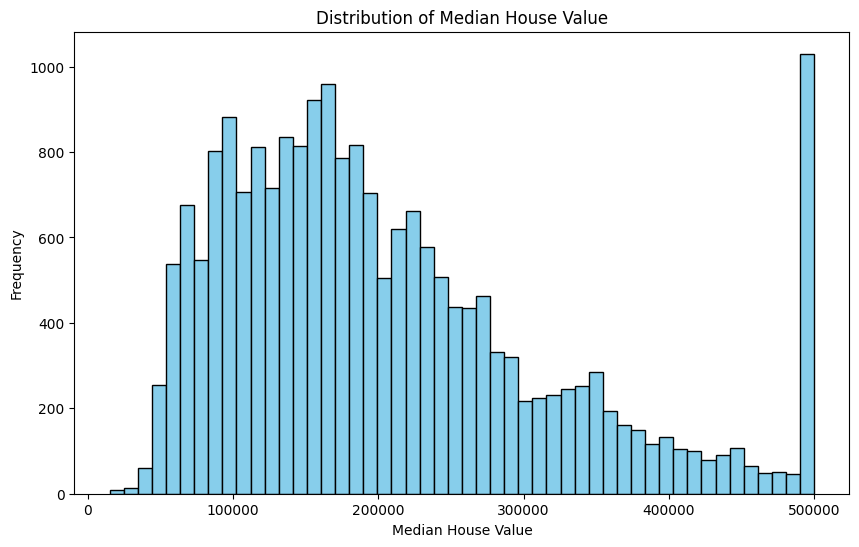

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                  'population', 'households', 'median_income', 'median_house_value']
correlation_matrix = df_housing[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(df_housing['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for the target variable
print(df_housing['median_house_value'].describe())

# Identify potential relationships (This will be done by inspecting the outputs above)

## Create a Test set:

Creating a test set is theoretically simple; pick some instances randomly, <br>
typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    """Shuffle the dataset and split it into a training set and a test set."""
    shuffled_indices = np.random.default_rng().permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return shuffled_indices, data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
shuffled_indices, train_set, test_set = shuffle_and_split_data(df_housing, 0.2)
print(f"First 10 shuffled indices: {shuffled_indices[:10]}")  # Display first 10 shuffled indices
print(f"Shuffled indices size: {len(shuffled_indices)}")
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

First 10 shuffled indices: [ 8770  9366  7436 12121  4314   493 19938 18126 10058  8321]
Shuffled indices size: 20640
Training set size: 16512
Test set size: 4128


In [ ]:
# Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways.
# The simplest function is train_test_split(), which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier,
# with a couple of additional features. First, there is a random_state parameter that allows you to set the random generator seed.
# Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (
# this is very useful, for example, if you have a separate DataFrame for labels):
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

> Instead of random sampling, we need to use **Stratified sampling**: <br>the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. <br>If the people running the survey used purely random sampling, there would be about a 10.7% chance of sampling a skewed test set with less than 48.5% female or more than 53.5% female participants. <br>Either way, the survey results would likely be quite biased.

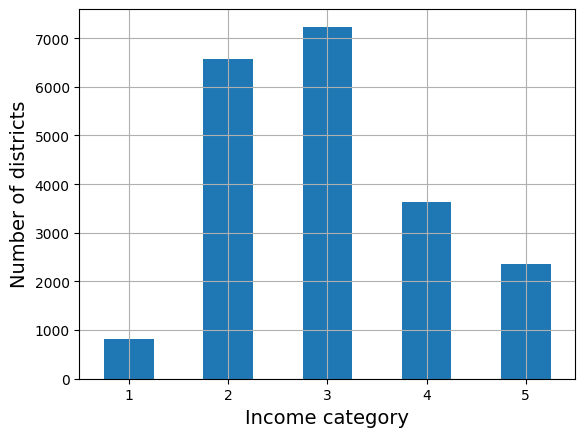

In [ ]:
df_housing["income_cat"] = pd.cut(df_housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df_housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)
# The stratify parameter ensures that the income_cat column is evenly distributed in both the training and test sets.

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
# You won’t use the income_cat column again, so you might as well drop it, reverting the data back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore and Visualize the Data to Gain Insights

In [ ]:
# Since you’re going to experiment with various transformations of the full training set, you should make a copy of the original
# so you can revert to it afterwards:
housing = strat_train_set.copy()

# Visualizing Geographical Data

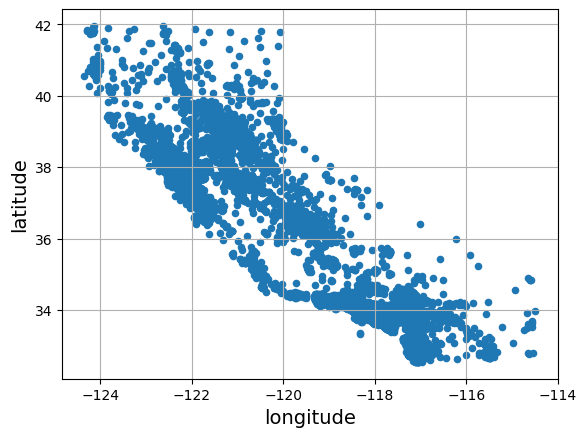

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()